# TP8 - Stochastic process generation
Eliott Van Dieren - epfl

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import math

In [81]:
Nj = 2
S = 12
percentiles = [i/S for i in range(S+1)]
strata = np.array([[st.norm.ppf(percentiles[i]),st.norm.ppf(percentiles[i+1])] for i in range(S)])


#final_values = np.linspace(-5,5,S*20).reshape(S,20)
final_vals_strat = np.array([[np.random.choice(strata[i]),np.random.choice(strata[i])] for i in range(len(final_values))])
T = 1

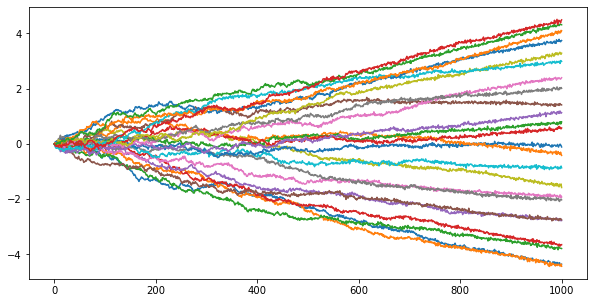

In [82]:
Nj = 2
S = 12
final_values = np.linspace(-5,5,S*20).reshape(S,20)
final_vals_strat = np.array([[np.random.choice(final_values[i]),np.random.choice(final_values[i])] for i in range(len(final_values))])
T = 1
M = 1000
def brownian_bridge(T,M,b):
    dt = T/M
    W = np.cumsum(np.sqrt(dt)*st.norm.rvs(size=M+1))
    X = np.zeros(M)
    for i in range(M):
        X[i] = W[i] + (i+1)*dt*(b-W[i+1])
    return np.append(0,X)

plt.figure(figsize=(10,5))
for strat in final_vals_strat:
    for val in strat:
        plt.plot(brownian_bridge(T,M,val))
        

In [83]:
X_0 = 6
sigma = 0.3
r = 0.05
M = 100
dt = 1/M

In [84]:
exp_Z = 0
for strat in final_vals_strat:
    strat_mean = 0
    for val in strat:
        W_t = brownian_bridge(T,M,val) # to compute Y_t = (r-sigma^2/2)t + sigma*W_t
        Y_t = (r-0.5*sigma**2)*np.array([i*dt for i in range(M+1)]) + sigma*W_t
        X_t = X_0*np.exp(Y_t)
        Z = np.max(X_t)-np.min(X_t)
        strat_mean += Z
    exp_Z += 1/S*strat_mean/Nj # += p_j*mu_i

print("Expectation Z = ", exp_Z)

Expectation Z =  6.018038624632387
